<a href="https://colab.research.google.com/github/claraaqn/Calculo-Numerico/blob/main/Atividade%2005%20-%20Ajuste%20de%20Curvas%20de%20MMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Dados fornecidos
x = np.array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8,
              -7, -6, -5, -4, -3, -2, -1, 0])
y = np.array([135665, 135390, 138360, 138220, 138620, 140525, 140065, 141075,
              140325, 141310, 141500, 139060, 136290, 138830, 139420, 140930,
              140285, 139605, 138020, 137434, 138455])

In [ ]:
# Função modelo que combina polinômio e componentes trigonométricas
def model(x, a, b, c, d, e, f, g):
    return (a * x**2 + b * x + c +
            d * np.sin(2 * np.pi * x / 7) +
            e * np.cos(2 * np.pi * x / 7) +
            f * np.sin(2 * np.pi * x / 14) +
            g * np.cos(2 * np.pi * x / 14))

In [ ]:
# Ajuste do modelo aos dados
params, params_covariance = curve_fit(model, x, y, maxfev=10000)

In [ ]:
# Parâmetros do modelo ajustado
a, b, c, d, e, f, g = params
print(f"Parâmetros do modelo: a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}, e={e:.2f}, f={f:.2f}, g={g:.2f}")

Parâmetros do modelo: a=-40.49, b=-733.89, c=137108.31, d=835.92, e=-587.55, f=-212.64, g=1260.51


In [ ]:
# Previsão para os dados existentes e próximo dia (x=1)
x_fit = np.linspace(-20, 1, 100)
y_fit = model(x_fit, a, b, c, d, e, f, g)

# Previsão para o próximo dia
proximo_dia = 1
previsao = model(proximo_dia, a, b, c, d, e, f, g)
print(f"Previsão para o próximo dia (x=1): {previsao:.0f}")

Previsão para o próximo dia (x=1): 137665


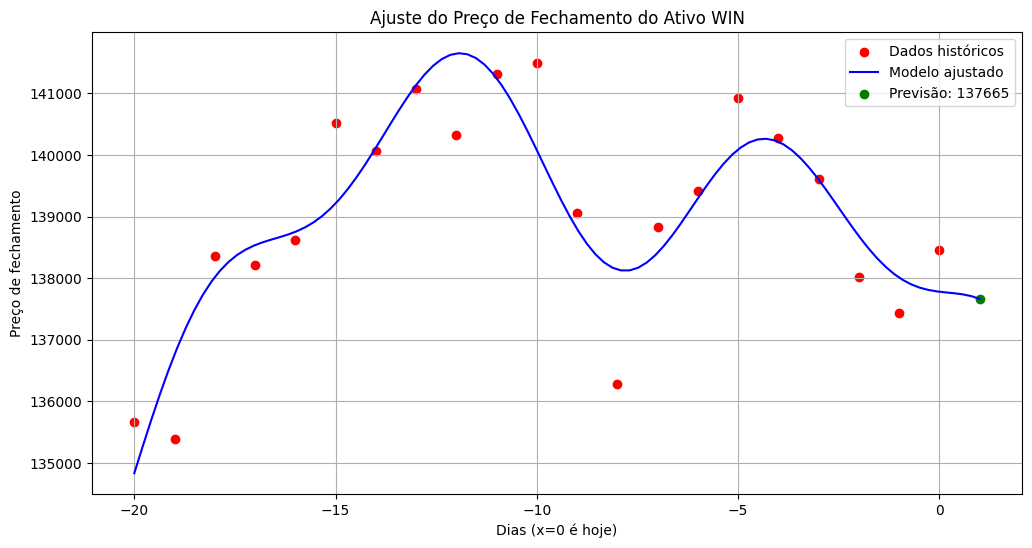

In [ ]:
# Visualização
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Dados históricos')
plt.plot(x_fit, y_fit, label='Modelo ajustado', color='blue')
plt.scatter(proximo_dia, previsao, color='green', label=f'Previsão: {previsao:.0f}')
plt.title('Ajuste do Preço de Fechamento do Ativo WIN')
plt.xlabel('Dias (x=0 é hoje)')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.grid(True)
plt.show()